In [1]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

# NOTE: please change the file path to be your root directory; not Cristian's :) 
keys = get_keys(".secret/yelp_api.json")

client_id = keys['client_id']
api_key = keys['api_key']

In [2]:
import requests

term = 'pizza'
location = 'NY'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "ysqgdbSrezXgVwER2kQWKA", "alias": "julianas-pizza-brooklyn-5", "name": "Juliana's Pizza", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/7JtwTxhWHf3YS70Ss_CfxA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/julianas-pizza-brooklyn-5?adjust_creative=-ZT-k4bjCiOA1R71AA_KdA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=-ZT-k4bjCiOA1R71AA_KdA", "review_count": 1944, "categories": [{"alias": "pizza", "title": "Pizza"}], "rating": 4.5, "coordinates": {"latitude": 40.7026153030093, "longitude": -73.9934159993549}, "transactions": [], "price": "$$", "location": {"address1": "19 Old Fulton St", "address2": "", "address3": "", "city": "Brooklyn", "zip_code": "11201", "country": "US", "state": "NY", "display_address": ["19 Old Fulton St", "Brooklyn, NY 11201"]}, "phone": "+17185966700", "display_phone": "(718) 596-6700", "distance": 323.20506308227306}, {"id": "zj8Lq1T8KIC5zwFief15jg", "alias": "pr

In [3]:
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [4]:
len(response.json()['businesses'])

10

In [5]:
response.json()['businesses'][0]

{'id': 'ysqgdbSrezXgVwER2kQWKA',
 'alias': 'julianas-pizza-brooklyn-5',
 'name': "Juliana's Pizza",
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/7JtwTxhWHf3YS70Ss_CfxA/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/julianas-pizza-brooklyn-5?adjust_creative=-ZT-k4bjCiOA1R71AA_KdA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=-ZT-k4bjCiOA1R71AA_KdA',
 'review_count': 1944,
 'categories': [{'alias': 'pizza', 'title': 'Pizza'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.7026153030093, 'longitude': -73.9934159993549},
 'transactions': [],
 'price': '$$',
 'location': {'address1': '19 Old Fulton St',
  'address2': '',
  'address3': '',
  'city': 'Brooklyn',
  'zip_code': '11201',
  'country': 'US',
  'state': 'NY',
  'display_address': ['19 Old Fulton St', 'Brooklyn, NY 11201']},
 'phone': '+17185966700',
 'display_phone': '(718) 596-6700',
 'distance': 323.20506308227306}

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with response.josn().keys(). Here, you'll see a key for 'total', which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

In [6]:
response.json()['total']

10700

In [7]:
# as found in https://stackoverflow.com/questions/35525994/how-to-request-more-than-20-results-from-yelp-api

def get_businesses(location, term, api_key):
    headers = {'Authorization': 'Bearer %s' % api_key}
    url = 'https://api.yelp.com/v3/businesses/search'

    data = []
    for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'location': location.replace(' ', '+'),
            'term': term.replace(' ', '+'),
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break

    return data

In [8]:
data = get_businesses(location, term, api_key)

In [9]:
len(data)

1000

In [10]:
import pandas as pd
df = pd.DataFrame(data)

In [11]:
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,julianas-pizza-brooklyn-5,"[{'alias': 'pizza', 'title': 'Pizza'}]","{'latitude': 40.7026153030093, 'longitude': -7...",(718) 596-6700,323.205063,ysqgdbSrezXgVwER2kQWKA,https://s3-media1.fl.yelpcdn.com/bphoto/7JtwTx...,False,"{'address1': '19 Old Fulton St', 'address2': '...",Juliana's Pizza,+17185966700,$$,4.5,1944,[],https://www.yelp.com/biz/julianas-pizza-brookl...
1,prince-street-pizza-new-york-2,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 40.7229087705545, 'longitude': -7...",(212) 966-4100,1941.963817,zj8Lq1T8KIC5zwFief15jg,https://s3-media3.fl.yelpcdn.com/bphoto/ZAukOy...,False,"{'address1': '27 Prince St', 'address2': None,...",Prince Street Pizza,+12129664100,$,4.5,2698,"[pickup, delivery]",https://www.yelp.com/biz/prince-street-pizza-n...
2,lombardis-pizza-new-york-4,"[{'alias': 'pizza', 'title': 'Pizza'}]","{'latitude': 40.7215934960083, 'longitude': -7...",(212) 941-7994,1798.995978,WIhm0W9197f_rRtDziq5qQ,https://s3-media1.fl.yelpcdn.com/bphoto/UZ6V_h...,False,"{'address1': '32 Spring St', 'address2': '', '...",Lombardi's Pizza,+12129417994,$$,4.0,5830,"[pickup, delivery]",https://www.yelp.com/biz/lombardis-pizza-new-y...
3,l-industrie-pizzeria-brooklyn,"[{'alias': 'pizza', 'title': 'Pizza'}]","{'latitude': 40.71162, 'longitude': -73.95783}",(718) 599-0002,3145.016041,v1DHGRNCH9247WLYoaoA9A,https://s3-media2.fl.yelpcdn.com/bphoto/SRL_Rz...,False,"{'address1': '254 S 2nd St', 'address2': '', '...",L'industrie Pizzeria,+17185990002,$,5.0,408,"[pickup, delivery]",https://www.yelp.com/biz/l-industrie-pizzeria-...
4,rizzos-fine-pizza-new-york-4,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 40.720852, 'longitude': -73.984456}",(646) 454-1262,1903.278835,nUpA3sY5b6dynC7aj0eV6A,https://s3-media3.fl.yelpcdn.com/bphoto/r4OPoX...,False,"{'address1': '17 Clinton St', 'address2': '', ...",Rizzo's Fine Pizza,+16464541262,$$,4.5,680,"[pickup, delivery, restaurant_reservation]",https://www.yelp.com/biz/rizzos-fine-pizza-new...


In [12]:
#initial EDE on the dataframe

In [13]:
#df.info()

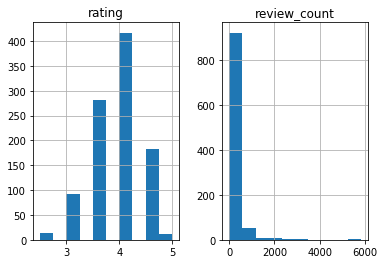

In [15]:
#plot histograms to check distribution of price, review_count and rating columns
df[['review_count', 'rating']].hist();

In [21]:
#dealing with nan values in price
df['price'].fillna(0)

0       $$
1        $
2       $$
3        $
4       $$
5       $$
6       $$
7        $
8       $$
9        $
10       $
11      $$
12      $$
13      $$
14      $$
15      $$
16      $$
17      $$
18      $$
19       $
20       $
21      $$
22      $$
23       $
24      $$
25       $
26      $$
27       $
28       $
29       0
      ... 
970      $
971      $
972      $
973     $$
974      $
975      $
976      $
977      $
978      $
979      0
980     $$
981      $
982      $
983      $
984      $
985      $
986     $$
987     $$
988      $
989      $
990     $$
991     $$
992      $
993      $
994      0
995     $$
996    $$$
997     $$
998      0
999     $$
Name: price, Length: 1000, dtype: object

In [22]:
try:
    df['price_index'] = df['price'].apply(lambda x: len(x))
except TypeError:
    df['price_index'] = df['price'].apply(lambda x: 0)

In [24]:
df['price_index'].head()

0    0
1    0
2    0
3    0
4    0
Name: price_index, dtype: int64